# Handle Features
This notebook describes per feature how to handle it

'new' (227): fill with median (0.0)
'seller (8830): if 'new' == 1 then 'seller' = 3 else if 'new' == 0 then seller = 2

latitude (0) and longitude(0): dropna

'district' (1): fill with median (4.0)

In [54]:
from utils_hasse import *

In [55]:
train_apartment = pd.read_csv('../data/apartments_train.csv')
train_building = pd.read_csv('../data/buildings_train.csv')
train = pd.merge(train_apartment, train_building, left_on='building_id', right_on='id')
train.rename(columns={'id_x' : 'apartment_id'}, inplace=True)
train.drop('id_y', axis=1, inplace=True)
train_original = train.copy()

In [56]:
handle_NaN(train)

TypeError: 

# Testing that changes don't mess up correlations

In [34]:
train.isna().sum()

apartment_id              0
seller                    0
price                     0
area_total                0
area_kitchen           4721
area_living            3882
floor                     0
rooms                     0
layout                17642
ceiling               11093
bathrooms_shared       3872
bathrooms_private      3872
windows_court          8072
windows_street         8072
balconies             10520
loggias               10520
condition              9810
phones                   80
building_id               0
new                       0
latitude                  0
longitude                 0
district                130
street                    0
address                   0
constructed             794
material               3972
stories                   0
elevator_without        357
elevator_passenger      357
elevator_service        357
parking                6788
garbage_chute          8811
heating                8161
dtype: int64

In [35]:
train_original.isna().sum()

apartment_id              0
seller                 8830
price                     0
area_total                0
area_kitchen           4721
area_living            3882
floor                     0
rooms                     0
layout                17642
ceiling               11093
bathrooms_shared       3872
bathrooms_private      3872
windows_court          8072
windows_street         8072
balconies             10520
loggias               10520
condition              9810
phones                   80
building_id               0
new                     264
latitude                  0
longitude                 0
district                130
street                    0
address                   0
constructed             794
material               3972
stories                   0
elevator_without        357
elevator_passenger      357
elevator_service        357
parking                6788
garbage_chute          8811
heating                8161
dtype: int64

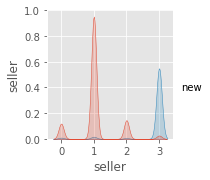

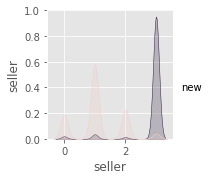

In [39]:
sns.pairplot(train[['new','seller']], hue='new')
sns.pairplot(train_original[['new','seller']], hue='new')

<function matplotlib.pyplot.show(close=None, block=None)>

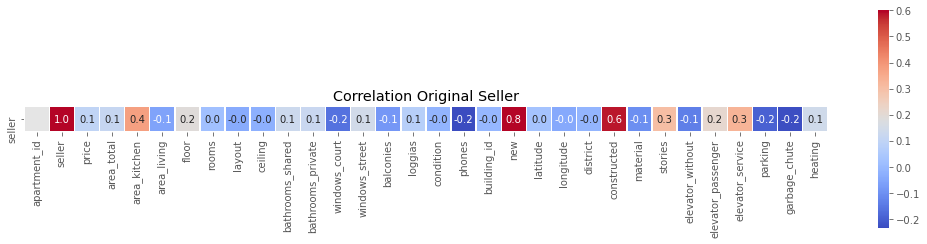

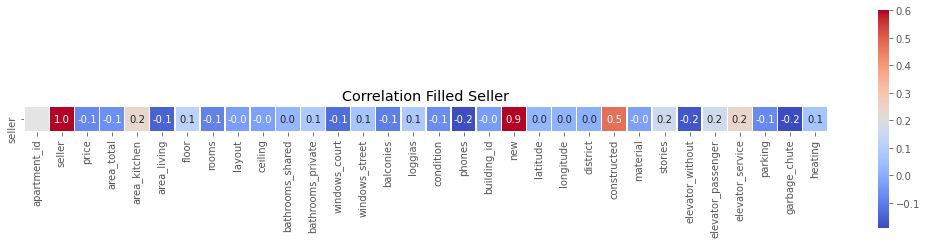

In [40]:
original = train_original.corr()[['seller']]
mask = np.zeros_like(original)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(18, 4))
sns.heatmap((original.T), mask=mask.T, vmax=0.6, square=True, cmap='coolwarm', annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Original Seller')
plt.show

filled = train.corr()[['seller']]
mask = np.zeros_like(filled)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(18, 4))
sns.heatmap((filled.T), mask=mask.T, vmax=0.6, square=True, cmap='coolwarm', annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Filled Seller')
plt.show

In [41]:
print(original)
print(filled)

                      seller
apartment_id       -0.050018
seller              1.000000
price               0.101015
area_total          0.114745
area_kitchen        0.376864
area_living        -0.055763
floor               0.190066
rooms               0.022096
layout             -0.039030
ceiling            -0.023600
bathrooms_shared    0.130936
bathrooms_private   0.122778
windows_court      -0.161819
windows_street      0.145882
balconies          -0.084547
loggias             0.077983
condition          -0.014768
phones             -0.234665
building_id        -0.005553
new                 0.791454
latitude            0.032564
longitude          -0.040801
district           -0.011025
constructed         0.583764
material           -0.103382
stories             0.305980
elevator_without   -0.134120
elevator_passenger  0.213775
elevator_service    0.330314
parking            -0.192977
garbage_chute      -0.229963
heating             0.142368
                      seller
apartment_id  

Conclusion: we have a worse correlation with price for seller when filling it based on the 'new' feature BUT if we simple fill the 'seller' column with the median, the result is the same -> use 'new'